## Linear SVM Classification

## Soft margin classification

In [1]:
#laoding iris dataset, scaling the features and then train a linear svm model to detect iris virginica flowers

import numpy as np 
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # petal length
y = (iris["target"] == 2).astype(np.float64) # iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
 svm_clf.predict([[5.5, 1.7]])


array([1.])

## Nonlinear SVM Classifier

In [3]:
#example of implementation of this using a toy dataset
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge",max_iter=10000))
 ])

polynomial_svm_clf.fit(X, y)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=10000))])

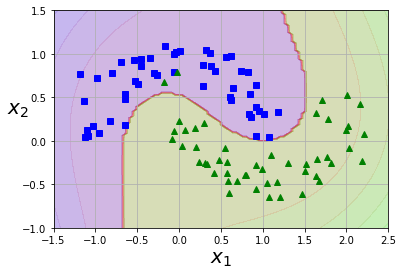

In [8]:
import matplotlib.pyplot as plt

#this is used to plot our dataset faster 
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


#copied from the book: its to define a function that will show me the plot prediction of our model
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Polynomial Kernel

In [9]:
from sklearn.svm import SVC

#what coef0 does is it allows us to control how much our model is influenced by high degree polynomial vs low degree ones
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

## Similarity Features

This is basically used to create a linearly separable dataset using a gaussian RBF (see the book).
it is usable and good for small datasets but if the dataset is large we might run into a problem, check page 160 for details.

## Gaussian KBF Kernel

In [10]:
#SVC with gaussian RBG
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Lower gamma makes the curve smoother while higher gamma makes it harsher; if your model is overfitting, you should reduce it and if it is underfitting, you should increase it (similar to the C hyperparameter).

### Rule of thumb; always go for linear since its the fastest, and if the dataset is small, go for gaussian KBF 

# Computational Complexity

linearSVC has a complexity of O(m*n)

the SVC class has a complexity that varies between O(m^3 *n) and O(m^2 *n)

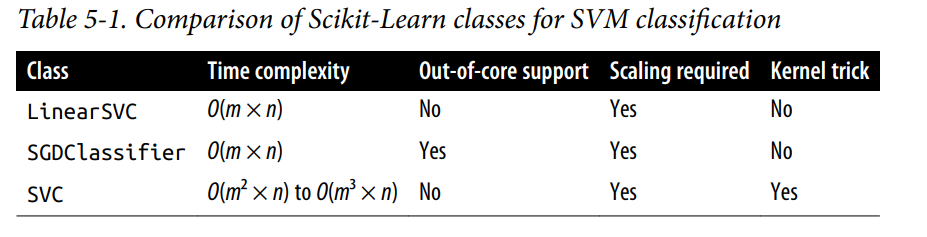

## SVM Regression

In [12]:
# example of svm regression; epsilon controls the width of the street and usually adding more training instances does not 
#affect the model's prediction
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)


LinearSVR(epsilon=1.5)

In [15]:
from sklearn.svm import SVR

#SVR is regression equivalent of SVC, LinearSVR is the regression equivalent of LinearSVC
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

## Under the Hood